<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment</h4>


________________________________________________________________________________________________________________________________

<h5 align="center"> Mohammad Hossein Shafiezadegan </h5>
<h5 align="center"> 99104781 </h5>

In [1]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt

# Q2: PCA in Image Processing (40 points)

In this question you will implement the PCA from scratch and apply it for dimensionality
reduction and image denoising. you will use the well-known MNIST data set that is commonly used for training various image processing systems.


#### 1. Data Preparation (5 points)
The MNIST data set is a large data set of handwritten digits (from
0 to 9), containing 60000 gray-scale images for training and 10000 for testing, each image has 28x28 pixels with range of possible values from 0 to 255.

we will consider a small sample of MNIST data set with size of 2000.

Re-scale the images to [0, 1] dividing them by 255. Vectorize each image xi ∈ $R^d$ and form a matrix X=$[x1, . . . , xn]^T$ ∈ $R_{n×d}$.
Remark that we will have d=784 and n=2000.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.datasets import mnist
from numpy.linalg import eig

11490434/11490434 [==============================] - 0s 0us/step


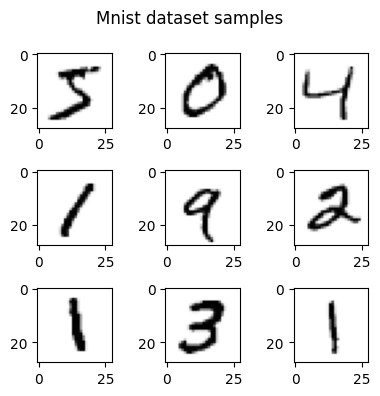

In [14]:
# TODO: load the data set(use just x_train for next part)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(4, 4))
for img, ax in zip(x_train, axs.ravel()):
    ax.imshow(img, cmap="Greys")
fig.suptitle("Mnist dataset samples")
plt.tight_layout()
plt.show()

In [15]:
# selecting 2000 images and dividing them by 255
x_train_norm = x_train[0:2000] / 255

# vectorize each image and forming matrix X
X = np.reshape(x_train_norm, (2000,784))

#### 2. Compute the Eigendecomposition (10 points)
Compute the eigendecomposition of the sample covariance matrix and use the eigenvalues to calculate the percentage of variance explained (given by the eigenvalues).
Plot the cumulative sum of these percentages (also known as cumulative explained variance. you can read about it in [cumulative explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/)) versus the number of components.

*Hint: you can use cumsum from Numpy to calculate the cumulative sum.*


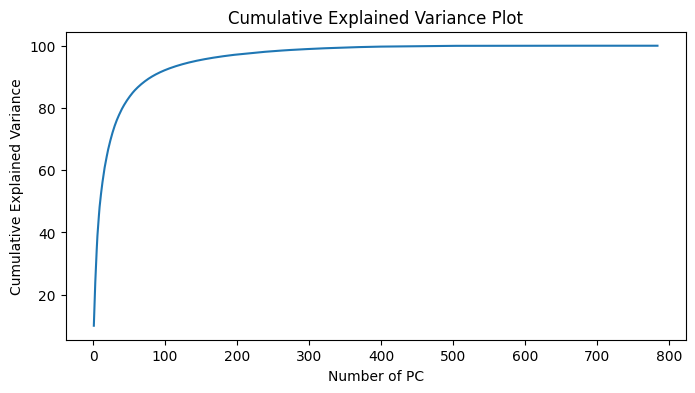

In [17]:
# Compute the sample covariance matrix
X_avg = X - np.mean(X, axis = 0)
# cov_mat = (X_avg.T@X_avg) / 1999
cov_mat = np.cov(X_avg.T)/1999

# Eigendecomposition of covariance matrix
eigvals, eigvecs = np.linalg.eig(cov_mat)
eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)

# Compute explained variance ---> eigenvalue/(sum of egn_values )
expl_var = eigvals / np.sum(eigvals) * 100

# Plot the cumulative explained variance
cum_expl_var = np.cumsum(expl_var)
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(range(1, len(eigvals) + 1), cum_expl_var)
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

<h3> <font color="green"> Explaination </font> </h3>

Based on the above curve, it can be seen that approximately 300 PCs consist almost all of the variance of our data. This means that will about 300 PCs we can represent our data with quit good accuracy and resolution so we can use 300 PCs instead of all 784 ones which can lead us to compression too.

#### 3. Reduce the Dimensionality (10 points)
Apply the PCA via Eigendecomposition to reduce the dimensionality of the images for each p ∈ {50, 250, 500}.

Compute the normalized reconstruction error in terms of the Frobenius norm, i.e. $e_p = \frac{||X - {X_p}||_F}{||X||_F}$ , where $X$ denotes the input matrix, and ${X_p}$ denotes the recovered matrix associated to each p.

Visualize some recovered images and compare them with their corresponding original images.

what happens when we reduce the number of components p?

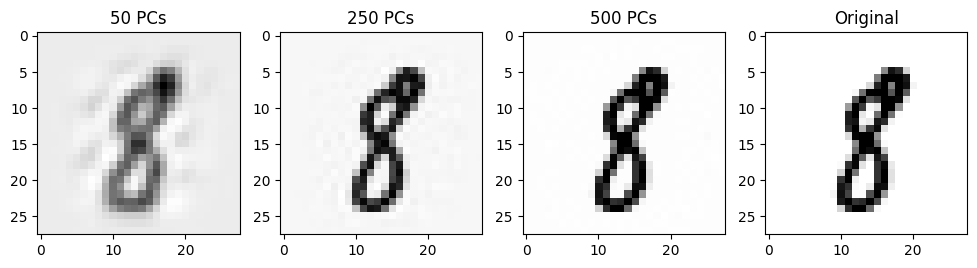

In [18]:
def PCA(p):
  # Apply the PCA
  eigvals_p = eigvals[:p]
  eigvecs_p = eigvecs[:, :p]

  projected_vectors = X_avg @ eigvecs_p

  # Reconstruct the orginal matrix X
  reconst_X = projected_vectors @ eigvecs_p.T

  return reconst_X + np.mean(X, axis = 0)

# Sorting eigvals and eigvecs in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

X_50 = PCA(50)
X_250 = PCA(250)
X_500 = PCA(500)

# Visualizing results
imgs = [X_50, X_250, X_500, X]
titles = ['50 PCs', '250 PCs', '500 PCs', 'Original']
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))
for i in range(len(imgs)):
    axs[i].imshow(imgs[i].reshape((2000,28, 28))[300,:,:], cmap="Greys")
    axs[i].set_title(titles[i])


the normalized reconstruction error for p = 50 :  0.3141542218816617
the normalized reconstruction error for p = 250 :  0.1018022323707786
the normalized reconstruction error for p = 500 :  0.015094813722609523


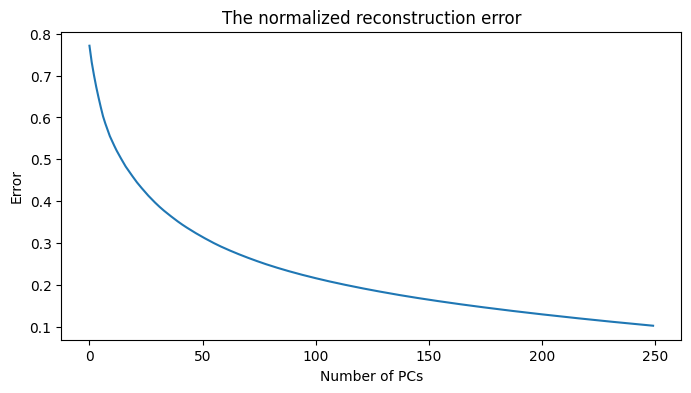

In [19]:
# Compute the normalized reconstruction error
error_50 = np.linalg.norm(X - X_50, ord='fro') / np.linalg.norm(X, ord='fro')
error_250 = np.linalg.norm(X - X_250, ord='fro') / np.linalg.norm(X, ord='fro')
error_500 = np.linalg.norm(X - X_500, ord='fro') / np.linalg.norm(X, ord='fro')

print('the normalized reconstruction error for p = 50 : ', error_50)
print('the normalized reconstruction error for p = 250 : ', error_250)
print('the normalized reconstruction error for p = 500 : ', error_500)

# Plot the normalized reconstruction error vs number of principal components
errors = []
for i in range(250):
  X_i = PCA(i)
  errors.append(np.linalg.norm(X - X_i, ord='fro') / np.linalg.norm(X, ord='fro'))

n = [n for n in range(250)]
plt.plot(n, errors)
plt.title('The normalized reconstruction error')
plt.ylabel('Error')
plt.xlabel('Number of PCs')
plt.show()


<h3> <font color="green"> Explaination </font> </h3>

As we expected, the more PCs we use to regenerate and reconstruct the image, the normalized reconstruction error will decrease.

#### 4. Image noising (5 points)
Considering the same input matrix, let’s add some Gaussian noise (make sure that the range of possible values of the generated noisy data will remain between 0 and1, as well as the input data) with zero mean and variance $σ^2$ = 0.25.

Visualize the corrupted images and compare them with their corresponding original images versus the number of components, as in the first item.

Compare it with the one obtained in the noiseless case.

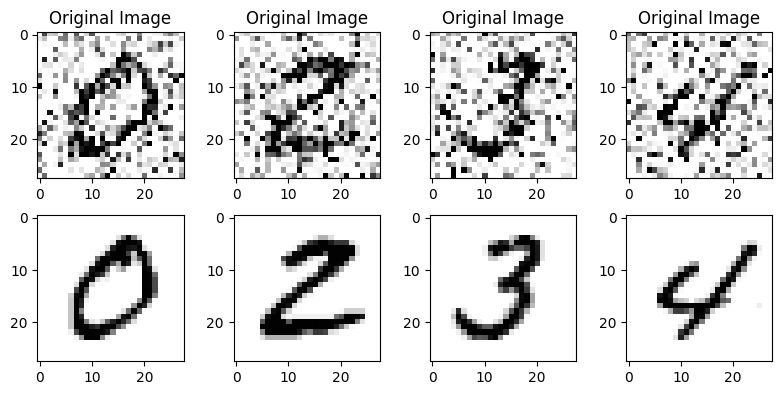

In [20]:
x_train_norm = x_train[0:2000] / 255

# Adding white gaussian noise with the given variance
X_noisy = x_train_norm + np.random.normal(0, np.sqrt(0.25), x_train_norm.shape)

# vectorize each image and forming matrix X
X_noisy = np.reshape(X_noisy, (2000,784))

# Since we have added the noise some values might exceed 1 and some might become less that zero
# So we cut and clip the result in range of [0, 1]
X_noisy = np.clip(X_noisy, 0, 1)

# Visualize the corrupted images
noisy_imgs = np.reshape(X_noisy, (2000, 28, 28))
original_imgs = np.reshape(x_train_norm, (2000, 28, 28))#x_train_norm #np.reshape(X, (2000, 28, 28))

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
for i in range(4):
    img1 = noisy_imgs[160*i+1,:,:]
    img2 = original_imgs[160*i+1,:,:]
    axs[0,i].imshow(img1, cmap="Greys")
    axs[1,i].imshow(img2, cmap="Greys")
    error = np.linalg.norm(img2 - img1, ord='fro') / np.linalg.norm(img2, ord='fro')
    axs[0,i].set_title(f"Noisy image \n Error: {error :.3f}")
    axs[0,i].set_title("Original Image")
plt.tight_layout()


#### 5. Recovering Images (10 points)
Now we will apply the PCA for image denoising. Generate the noisy data, for each $σ^2$ ∈ {0.15, 0.25, 0.50}.
Apply the PCA via Eigendecomposition for each $σ^2$ and fixing p = 250.

Visualize some recovered images and compare them with their corresponding noisy images.

Compute the normalized reconstruction error in terms of the Frobenius norm, obtained for all values of $σ^2$, with respect to the original images.


In [21]:
# Apply PCA via Eigendecomposition
def PCA(X):

  # Subtracting average from data to prepare it for calculating sample covariance matrix
  X_avg = X - np.mean(X, axis = 0)
  cov_mat = (X_avg.T@X_avg) / 1999

  # Eigendecomposition of covariance matrix
  eigvals, eigvecs = np.linalg.eig(cov_mat)

  # Sorting eigvals and eigvecs in descending order
  idx = np.argsort(eigvals)[::-1]
  eigvals = eigvals[idx]
  eigvecs = eigvecs[:, idx]

  # Apply the PCA
  eigvals_p = eigvals[:250]
  eigvecs_p = eigvecs[:, :250]
  projected_vectors = X_avg @ eigvecs_p

  # Reconstruct the orginal matrix X
  reconst_X = projected_vectors @ eigvecs_p.T + np.mean(X, axis = 0)
  reconst_X = np.clip(reconst_X, 0, 1)

  return reconst_X

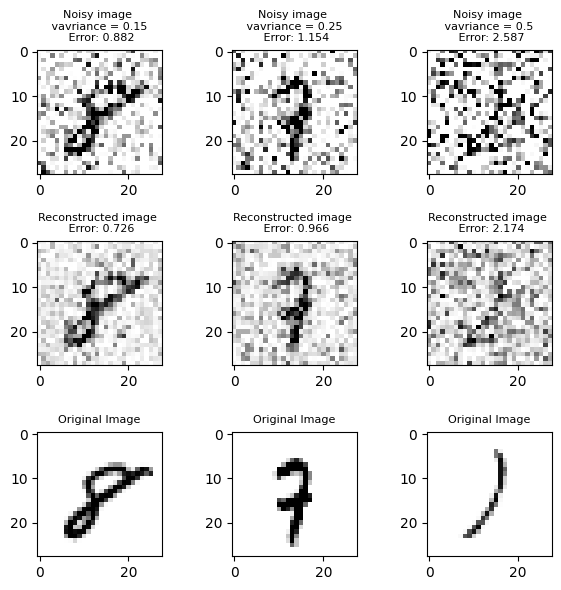

In [22]:
# TODO: Generating noisy data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_norm = x_train[0:2000] / 255

# Adding gaussian white nois with 3 different variances to our images
var = [0.15, 0.25, 0.5]
X_noisy_1 = x_train_norm + np.random.normal(0, np.sqrt(var[0]), x_train_norm.shape)
X_noisy_2 = x_train_norm + np.random.normal(0, np.sqrt(var[1]), x_train_norm.shape)
X_noisy_3 = x_train_norm + np.random.normal(0, np.sqrt(var[2]), x_train_norm.shape)

# vectorizing the images
X_noisy_1 = np.reshape(X_noisy_1, (2000,784))
X_noisy_2 = np.reshape(X_noisy_2, (2000,784))
X_noisy_3 = np.reshape(X_noisy_3, (2000,784))

# Since we have added the noise some values might exceed 1 and some might become less that zero
# So we cut and clip the result in range of [0, 1]
X_noisy_1 = np.clip(X_noisy_1, 0, 1)
X_noisy_2 = np.clip(X_noisy_2, 0, 1)
X_noisy_3 = np.clip(X_noisy_3, 0, 1)

# Reconstruct the images from noisy ones using PCA
X_recon_1 = PCA(X_noisy_1)
X_recon_2 = PCA(X_noisy_2)
X_recon_3 = PCA(X_noisy_3)

# Visualizing results
recon_imgs = [X_recon_1, X_recon_2, X_recon_3]
noisy_imgs = [X_noisy_1, X_noisy_2, X_noisy_3]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
for i in range(3):
    idx = np.random.randint(1,2000)
    img1 = noisy_imgs[i].reshape((2000,28, 28))[idx,:,:]
    img2 = recon_imgs[i].reshape((2000,28, 28))[idx,:,:]
    img3 = x_train_norm[idx,:,:]
    axs[0,i].imshow(img1, cmap="Greys")
    axs[1,i].imshow(img2, cmap="Greys")
    axs[2,i].imshow(img3, cmap="Greys")
    error1 = np.linalg.norm(img3 - img1, ord='fro') / np.linalg.norm(img3, ord='fro')
    error2 = np.linalg.norm(img3 - img2, ord='fro') / np.linalg.norm(img3, ord='fro')
    axs[0,i].set_title(f"Noisy image \n vavriance = {var[i]} \n Error: {error1 :.3f}", fontsize=8)
    axs[1,i].set_title(f"Reconstructed image \n Error: {error2 :.3f}", fontsize=8)
    axs[2,i].set_title("Original Image", fontsize=8)
plt.tight_layout()


<h3> <font color="green"> Explaination </font> </h3>

In the above figure, the first row shows the noisy images with their corresponding variances. The second row shows the reconstructed images and their correspoding normalized error. Finally the last row represents the original images.
As it can be seen, the value of normalized reconstruction error has decreased in each row which means that our method has reduced the noise and created a higher quality image.

We remember that the added noise is so much which has affected our images a lot as it can be seen in the figures. When we add a noise to an image. We expect that it affects the lower priority and less important components so when we choose a particular number of PCs the affect of the noise will be reduced.  

the normalized reconstruction error for p = 50 :  0.6864569592318124
the normalized reconstruction error for p = 250 :  0.8552745345112469
the normalized reconstruction error for p = 500 :  1.0829886288570905 



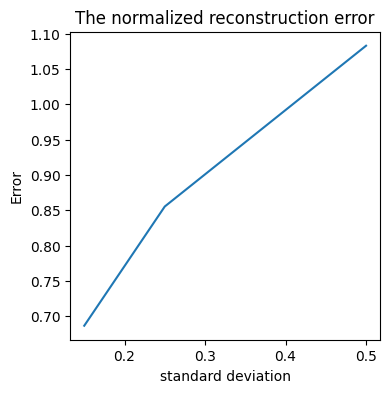

In [23]:
# TODO: compute the normalized reconstruction
x_train_norm = x_train[0:2000] / 255
X = np.reshape(x_train_norm, (2000,784))


error_1 = np.linalg.norm(X - X_recon_1, ord='fro') / np.linalg.norm(X, ord='fro')
error_2 = np.linalg.norm(X - X_recon_2, ord='fro') / np.linalg.norm(X, ord='fro')
error_3 = np.linalg.norm(X - X_recon_3, ord='fro') / np.linalg.norm(X, ord='fro')

print('the normalized reconstruction error for p = 50 : ', error_1)
print('the normalized reconstruction error for p = 250 : ', error_2)
print('the normalized reconstruction error for p = 500 : ', error_3 , '\n')

# TODO: plot the normalized reconstruction error
plt.rcParams['figure.figsize'] = (4,4)
plt.plot([0.15, 0.25, 0.5], [error_1, error_2, error_3])
plt.title('The normalized reconstruction error')
plt.ylabel('Error')
plt.xlabel('standard deviation')
plt.show()

<h3> <font color="green"> Explaination </font> </h3>

As it can be seen, increasing the variance of the noise will affect the image quality more and this will lead to poor reconstruction of the image so that the normalaized reconstruction error will increase respectievly